In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib as mpl
import sys
sys.path.append("..")

from pc import PC


In [2]:
mutua_data = np.loadtxt("data/mutualism.csv", delimiter=",")
compe_data = np.loadtxt("data/competition.csv", delimiter=",")


In [3]:
S = 20
x, y = mutua_data


In [4]:
pc = PC(x, y, p = 1)
pc.calc()


array([[71., 40.,  0.],
       [80., 36.,  0.]])

In [5]:
def get_causality_series(x, y):
    L = mutua_data.shape[1]
    corr = np.zeros(L - S)
    pattern_causality = np.zeros((2, L - S, 3))
    for t in np.arange(S, L):
        corr[t - S] = stats.pearsonr(x[:t], y[:t]).statistic
        pc = PC(x[:t], y[:t], p=1)

        pattern_causality[:, t - S, :] = pc.calc() / pc.L

    return corr, pattern_causality


In [6]:
m_corr, m_cause = get_causality_series(*mutua_data)


In [7]:
c_corr, c_cause = get_causality_series(*compe_data)


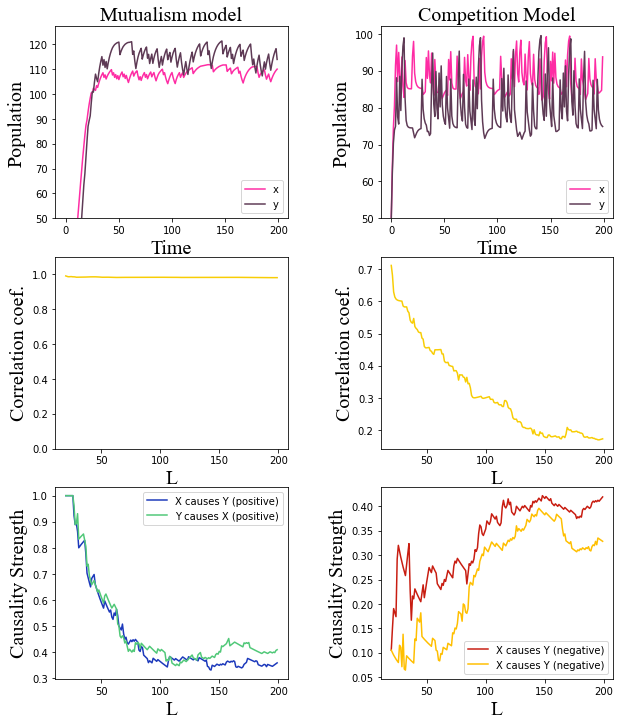

In [8]:
font = mpl.font_manager.FontProperties(
    'Times New Roman', size=20, weight=500)  # 指定字体

ix = np.arange(S, c_cause.shape[1] + S)
fig, axe = plt.subplots(3, 2, figsize=(10, 12))

axe[0][0].plot(mutua_data[0], label='x', color="#fe2ca4")
axe[0][0].plot(mutua_data[1], label='y', color="#5e3a55")
axe[0][1].plot(compe_data[0], label='x', color="#fe2ca4")
axe[0][1].plot(compe_data[1], label='y', color="#5e3a55")


axe[0][0].set_ylim(50, None)
axe[0][1].set_ylim(50, None)
axe[0][0].set_title('Mutualism model', font=font)
axe[0][1].set_title('Competition Model', font=font)
axe[0][0].set_ylabel('Population', font=font)
axe[0][1].set_ylabel('Population', font=font)
axe[0][0].set_xlabel('Time', font=font)
axe[0][1].set_xlabel('Time', font=font)

axe[0][1].legend()
axe[0][0].legend()

fig.subplots_adjust(wspace=0.4)
axe[1][0].plot(ix, m_corr, color="#f8cd05")
# axe[1][0].set_title('Mutualism model', font=font)
# axe[1][1].set_title('Competition Model', font=font)
axe[1][0].set_ylabel('Correlation coef.', font=font)
axe[1][0].set_xlabel('L', font=font)
axe[1][1].plot(ix, c_corr, color="#f8cd05")
axe[1][1].set_ylabel('Correlation coef.', font=font)
axe[1][1].set_xlabel('L', font=font)
axe[1][0].set_ylim(0, 1.1)

# axe[1][0].legend()
# axe[1][1].legend()

axe[2][0].plot(ix, m_cause[0, :, 0], color='#1c39bb',
               label="X causes Y (positive)")
axe[2][0].plot(ix, m_cause[1, :, 0], color='#50c878',
               label="Y causes X (positive)")

axe[2][1].plot(ix, c_cause[0, :, 1], color="#c81d11",
               label="X causes Y (negative)")
axe[2][1].plot(ix, c_cause[1, :, 1], color="#ffbf00",
               label="X causes Y (negative)")

# axe[2][0].set_title('Mutualism model', font=font)
axe[2][0].set_ylabel('Causality Strength', font=font)
axe[2][0].set_xlabel('L', font=font)
# axe[2][1].set_title('Competition Model', font=font)
axe[2][1].set_ylabel('Causality Strength', font=font)
axe[2][1].set_xlabel('L', font=font)

axe[2][0].legend()
axe[2][1].legend()

plt.savefig("output.svg", format="svg")

plt.show()
